# Conch Republic Coral Quest🧭 Florida Keys Data Challenge

# **STEP 1: Setup and Extract the Dataset**                                    


In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_path = "/content/Florida Keys Coral Reef Evaluation Dataset.zip"
extract_path = "/content/CREMP_extracted"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


/content/CREMP_extracted/CREMP_CSV_files/CREMP_SCOR_Summaries_2023_LTA.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_SCOR_RawData_2023.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_Stations_2023.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_SCOR_Summaries_2023_ConditionCounts.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_SCOR_Summaries_2023_Counts.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_Temperatures_2023.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_Pcover_2023_TaxaGroups.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_OCTO_Summaries_2023_Density.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_SCOR_Summaries_2023_Density.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_OCTO_RawData_2023.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_OCTO_Summaries_2023_MeanHeight.csv
/content/CREMP_extracted/CREMP_CSV_files/CREMP_Pcover_2023_StonyCoralSpecies.csv


**STEP 2: Load the Most Relevant CSV Files**                                  
Goal: Load 6 key CSVs into pandas for analysis.

In [ ]:
import pandas as pd

# Define file paths
base_path = "/content/CREMP_extracted/CREMP_CSV_files"

# Load relevant files
coral_cover = pd.read_csv(f"{base_path}/CREMP_Pcover_2023_StonyCoralSpecies.csv")
stony_density = pd.read_csv(f"{base_path}/CREMP_SCOR_Summaries_2023_Density.csv")
lta = pd.read_csv(f"{base_path}/CREMP_SCOR_Summaries_2023_LTA.csv")
octo_density = pd.read_csv(f"{base_path}/CREMP_OCTO_Summaries_2023_Density.csv")
temperature = pd.read_csv(f"{base_path}/CREMP_Temperatures_2023.csv")
stations = pd.read_csv(f"{base_path}/CREMP_Stations_2023.csv")

# Preview each file (first 5 rows)
coral_cover.head(), stony_density.head(), lta.head(), octo_density.head(), temperature.head(), stations.head()


(   OID_  Year               Date Subregion Habitat  SiteID    Site_name  \
 0     1  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
 1     2  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
 2     3  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
 3     4  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
 4     5  1996  7/22/1996 0:00:00        UK      HB      11   El Radabob   
 
    StationID Surveyed_all_years  points  ...  Porites_porites_complex  \
 0        101                  N     479  ...                      0.0   
 1        102                  N     525  ...                      0.0   
 2        103                  N     558  ...                      0.0   
 3        104                  N     446  ...                      0.0   
 4        111                  N     450  ...                      0.0   
 
    Pseudodiploria_clivosa  Pseudodiploria_strigosa  Scleractinia  Scolymia_sp  \
 0            

# **STEP 3: Clean and Prepare the Data**

**Step 3.1: Clean Date Formats and Columns**

In [ ]:
# Convert 'Date' column to datetime
coral_cover['Date'] = pd.to_datetime(coral_cover['Date'], errors='coerce')
stony_density['Date'] = pd.to_datetime(stony_density['Date'], errors='coerce')
lta['Date'] = pd.to_datetime(lta['Date'], errors='coerce')
octo_density['Date'] = pd.to_datetime(octo_density['Date'], errors='coerce')
temperature['Date'] = pd.to_datetime(temperature['Year'].astype(str) + '-' +
                                     temperature['Month'].astype(str) + '-' +
                                     temperature['Day'].astype(str), errors='coerce')

# Check missing values (NaNs) in temperature
print("Temperature missing values:\n", temperature.isnull().sum())

#Drop unnecessary columns
columns_to_keep = ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']
coral_cover_clean = coral_cover[columns_to_keep + [col for col in coral_cover.columns if 'coral' in col.lower() or 'cover' in col.lower()]]
stony_density_clean = stony_density[columns_to_keep + [col for col in stony_density.columns if 'density' in col.lower()]]
lta_clean = lta[columns_to_keep + [col for col in lta.columns if 'lta' in col.lower() or 'tissue' in col.lower()]]
octo_density_clean = octo_density[columns_to_keep + [col for col in octo_density.columns if 'octocoral' in col.lower() or 'density' in col.lower()]]


Temperature missing values:
 OID_         0
SiteID       0
Site_name    0
Year         0
Month        0
Day          0
Time         0
TempC        0
TempF        2
Date         0
dtype: int64


**Step 3.2: Merge Core Datasets on Shared Columns**

In [ ]:
# Merge datasets step-by-step (inner join to keep only common records)
merged = coral_cover_clean.merge(stony_density_clean, on=["StationID", "Year", "Date", "SiteID", "Site_name", "Subregion", "Habitat"], how="inner")
merged = merged.merge(lta_clean, on=["StationID", "Year", "Date", "SiteID", "Site_name", "Subregion", "Habitat"], how="inner")
merged = merged.merge(octo_density_clean, on=["StationID", "Year", "Date", "SiteID", "Site_name", "Subregion", "Habitat"], how="inner")

# Display shape and sample
print("Merged dataset shape:", merged.shape)
merged.head()


Merged dataset shape: (924, 8)


,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Total_Octocorals
0,2011,2011-06-08,UK,P,32,Porter Patch,321,9.0
1,2011,2011-06-08,UK,P,32,Porter Patch,322,NaN
2,2011,2011-06-08,UK,P,32,Porter Patch,323,7.2
3,2011,2011-06-08,UK,P,32,Porter Patch,324,8.6
4,2011,2011-06-11,UK,P,33,Admiral,331,2.3


**Step 3.3: Add Temperature Data to Merged Dataset**

In [ ]:
# Compute average temperature per SiteID and Year
temperature_avg = temperature.groupby(['SiteID', 'Year'])['TempC'].mean().reset_index()
temperature_avg.rename(columns={'TempC': 'Avg_TempC'}, inplace=True)

# Check if 'Avg_TempC' already exists in merged DataFrame
if 'Avg_TempC' in merged.columns:
    merged = merged.drop(columns=['Avg_TempC'])

# Merge the temperature data safely
merged_final = merged.merge(temperature_avg, on=['SiteID', 'Year'], how='left')

# Show output
print("✅ Final merged dataset shape:", merged_final.shape)
display(merged_final.head())



✅ Final merged dataset shape: (924, 9)


,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Total_Octocorals,Avg_TempC
0,2011,2011-06-08,UK,P,32,Porter Patch,321,9.0,26.52356
1,2011,2011-06-08,UK,P,32,Porter Patch,322,NaN,26.52356
2,2011,2011-06-08,UK,P,32,Porter Patch,323,7.2,26.52356
3,2011,2011-06-08,UK,P,32,Porter Patch,324,8.6,26.52356
4,2011,2011-06-11,UK,P,33,Admiral,331,2.3,NaN


# **STEP 4: Detailed Exploratory Data Analysis (EDA)**

**PART 1: Time Trends in Coral Health**                                       
**📈 Line Plot: Total Octocorals Over Time**



<ipython-input-10-a1f3b5e04dfb>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_final, x='Year', y='Total_Octocorals', ci=None, estimator='mean', marker='o')


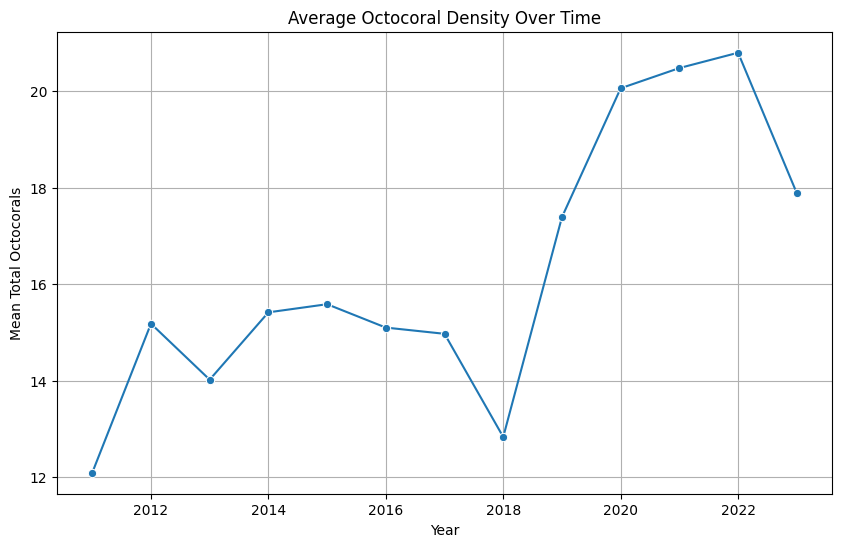

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average octocoral count per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_final, x='Year', y='Total_Octocorals', ci=None, estimator='mean', marker='o')
plt.title('Average Octocoral Density Over Time')
plt.ylabel('Mean Total Octocorals')
plt.xlabel('Year')
plt.grid(True)
plt.show()


**🌡️ Line Plot: Average Temperature Over Time**

<ipython-input-11-2e7a0d6be137>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_final, x='Year', y='Avg_TempC', ci=None, estimator='mean', marker='o', color='red')


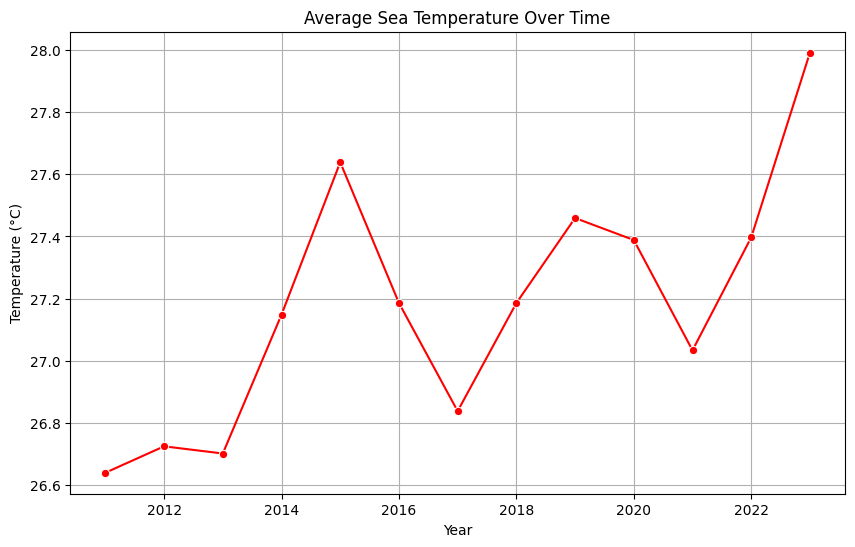

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_final, x='Year', y='Avg_TempC', ci=None, estimator='mean', marker='o', color='red')
plt.title('Average Sea Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


**PART 2: Subregion-wise Octocoral Comparison**

**📊 Plot: Average Octocoral Density by Subregion**

<ipython-input-12-1e4c950f4948>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_final, x='Subregion', y='Total_Octocorals', ci=None, estimator='mean')


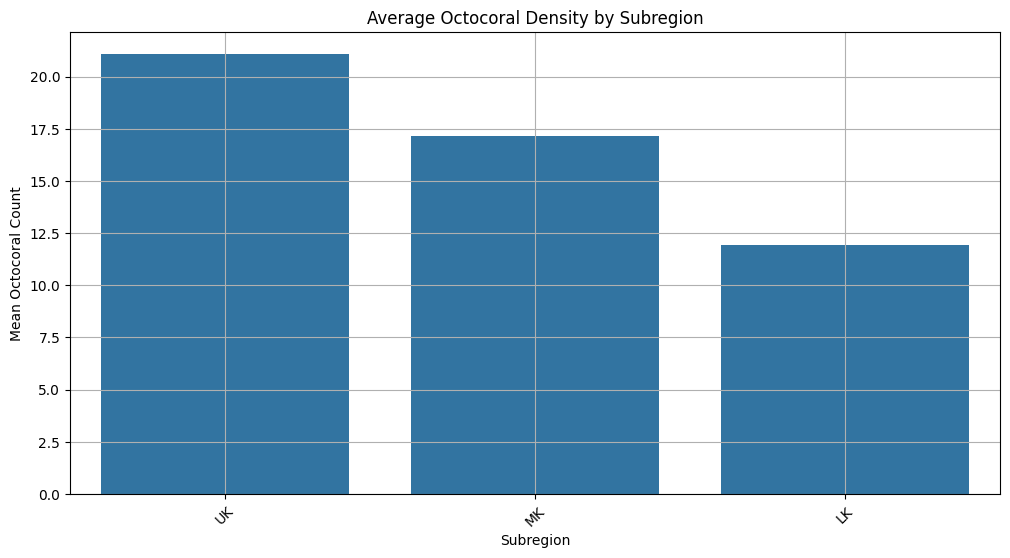

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_final, x='Subregion', y='Total_Octocorals', ci=None, estimator='mean')
plt.title('Average Octocoral Density by Subregion')
plt.ylabel('Mean Octocoral Count')
plt.xlabel('Subregion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**PART 3: Relationship Between Temperature and Octocoral Density**

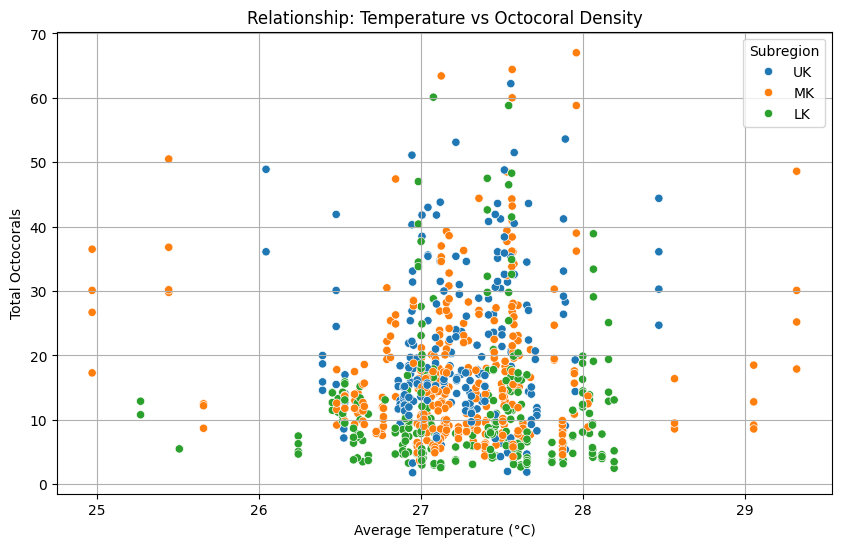

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_final, x='Avg_TempC', y='Total_Octocorals', hue='Subregion')
plt.title('Relationship: Temperature vs Octocoral Density')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Octocorals')
plt.grid(True)
plt.show()


 **PART 4: Station-Level Analysis (Boxplot)**

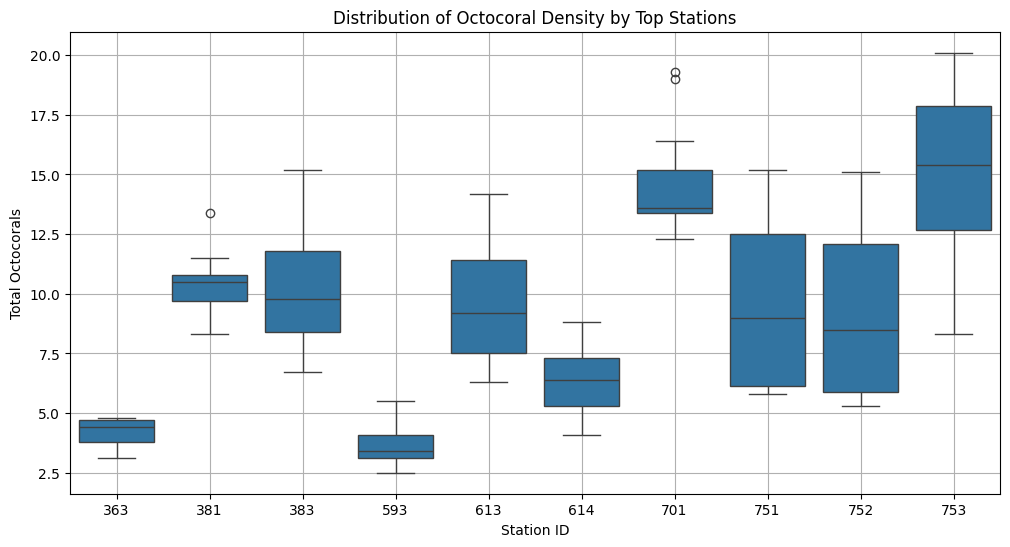

In [ ]:
top_stations = merged_final['StationID'].value_counts().index[:10]
filtered_data = merged_final[merged_final['StationID'].isin(top_stations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='StationID', y='Total_Octocorals')
plt.title('Distribution of Octocoral Density by Top Stations')
plt.ylabel('Total Octocorals')
plt.xlabel('Station ID')
plt.grid(True)
plt.show()


**PART 5: Species Richness Calculations and Trends**

**Line chart:Species Richness Over Time**

<ipython-input-15-be2bf35fdb8f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=coral_cover, x='Year', y='Species_Richness', ci=None, estimator='mean', marker='o', color='green')


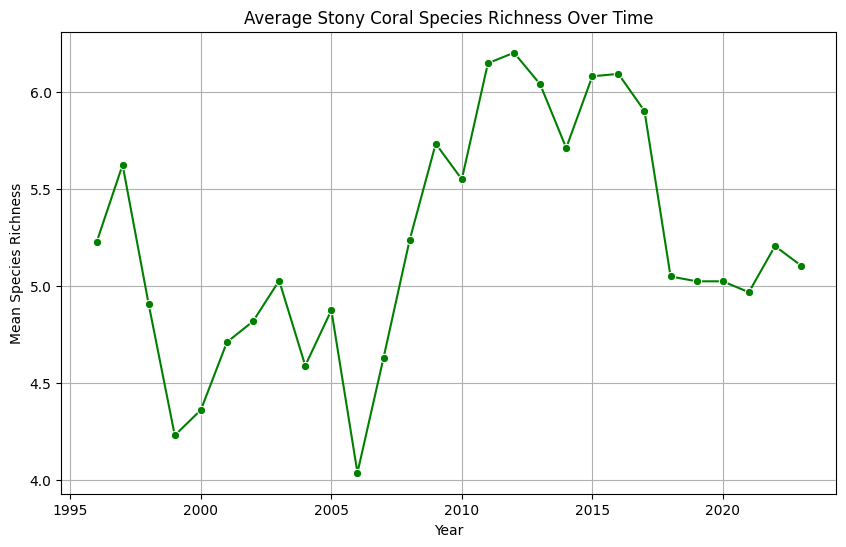

In [ ]:
# Step 1: Remove metadata columns to isolate species columns
non_species_cols = ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']
species_data = coral_cover.drop(columns=non_species_cols)

# Step 2: Create a richness column (count of non-zero species per row)
coral_cover['Species_Richness'] = species_data.gt(0).sum(axis=1)

# Step 3: Plot average species richness over time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=coral_cover, x='Year', y='Species_Richness', ci=None, estimator='mean', marker='o', color='green')
plt.title("Average Stony Coral Species Richness Over Time")
plt.ylabel("Mean Species Richness")
plt.xlabel("Year")
plt.grid(True)
plt.show()


**CORRELATION HEATMAP: Biological Metrics vs. Temperature**

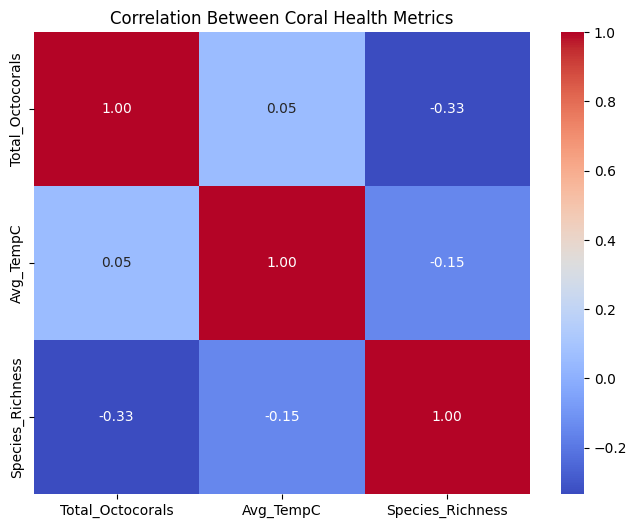

In [ ]:
# Select relevant numeric variables
corr_data = merged_final[['Total_Octocorals', 'Avg_TempC']]
# Join with species richness by StationID and Year
species_avg = coral_cover.groupby(['StationID', 'Year'])['Species_Richness'].mean().reset_index()
corr_merged = merged_final.merge(species_avg, on=['StationID', 'Year'], how='left')

# Final data for correlation
corr_data = corr_merged[['Total_Octocorals', 'Avg_TempC', 'Species_Richness']].dropna()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Coral Health Metrics")
plt.show()


**Part 6: Supplementary Visual Analysis**

**Stacked Area Chart:Species Percent Cover (Top 10)**

<Figure size 1200x600 with 0 Axes>

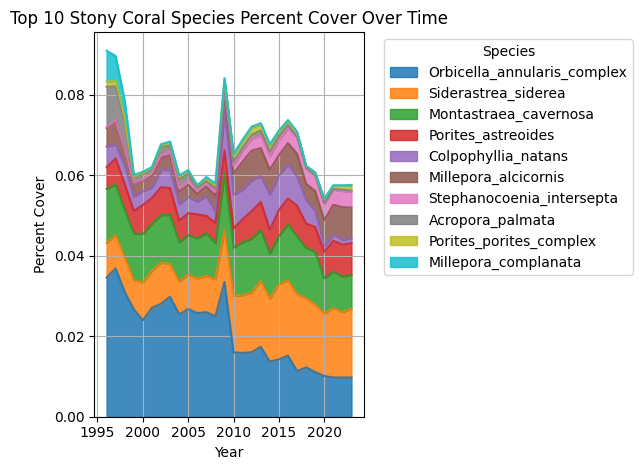

In [ ]:
import matplotlib.pyplot as plt

# Exclude non-species columns including 'Species_Richness' explicitly
non_species_cols = ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name',
                    'StationID', 'Surveyed_all_years', 'points', 'Species_Richness']
species_cols = [col for col in coral_cover.columns if col not in non_species_cols]

# Group by year and calculate mean percent cover for each species
species_cover = coral_cover.groupby('Year')[species_cols].mean()

# Identify the top 10 species with highest average percent cover
top_species = species_cover.mean().sort_values(ascending=False).head(10).index
species_cover_top = species_cover[top_species]

# Plot the top 10 species
plt.figure(figsize=(12, 6))
species_cover_top.plot(kind='area', stacked=True, alpha=0.85, colormap='tab10')
plt.title("Top 10 Stony Coral Species Percent Cover Over Time")
plt.xlabel("Year")
plt.ylabel("Percent Cover")
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()






**Boxplot: Living Tissue Area (LTA) Distribution**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: View all columns in your LTA DataFrame
print("Columns in lta DataFrame:")
print(lta.columns.tolist())


Columns in lta DataFrame:
['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Acropora_cervicornis', 'Acropora_palmata', 'Acropora_prolifera', 'Agaricia_fragilis', 'Agaricia_lamarcki', 'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus', 'Dichocoenia_stokesii', 'Diploria_labyrinthiformis', 'Eusmilia_fastigiata', 'Favia_fragum', 'Helioseris_cucullata', 'Isophyllia_rigida', 'Isophyllia_sinuosa', 'Madracis_aurentenra', 'Madracis_decactis', 'Madracis_pharensis', 'Madracis_scenaria', 'Madracis_sp', 'Manicina_areolata', 'Meandrina_meandrites', 'Millepora_complanata', 'Montastraea_cavernosa', 'Mussa_angulosa', 'Mycetophyllia_aliciae', 'Mycetophyllia_danaana', 'Mycetophyllia_ferox', 'Mycetophyllia_lamarckiana', 'Mycetophyllia_sp', 'Oculina_diffusa', 'Oculina_robusta', 'Orbicella_annularis_complex', 'Orbicella_faveolata', 'Orbicella_franksi', 'Phyllangia_americana', 'Porites_astreoides', 'Porites_branneri', 'Porites_porites', 'Pseudodiploria_clivosa', 

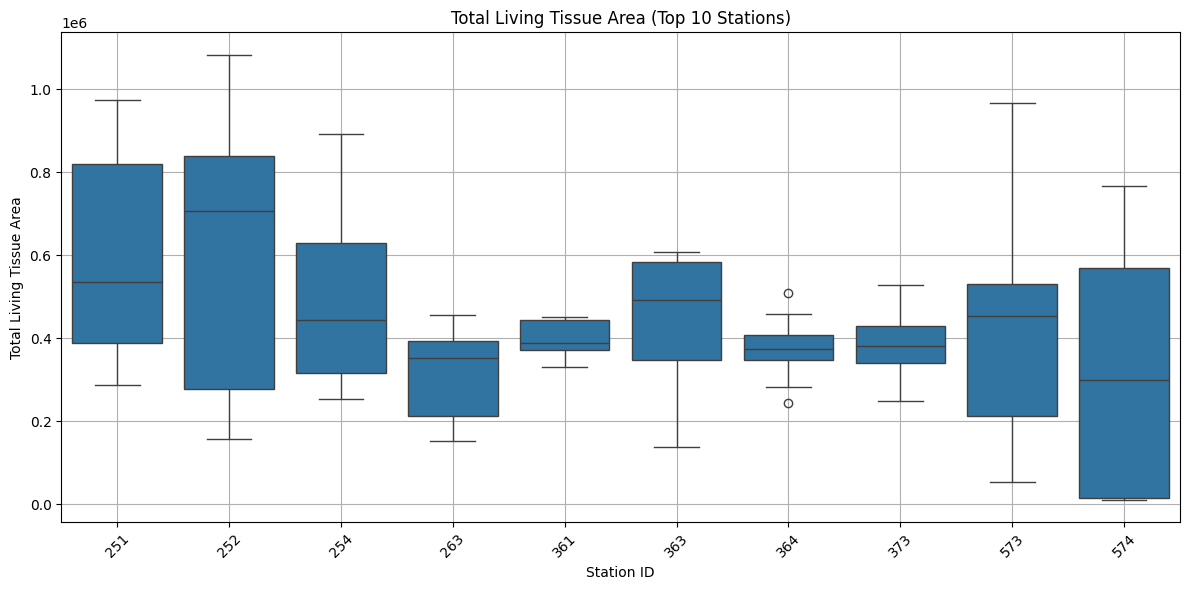

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify species columns
meta_cols = ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']
species_cols = [col for col in lta.columns if col not in meta_cols]

# Step 2: Compute total tissue area per row
lta['Total_Tissue_Area'] = lta[species_cols].sum(axis=1)

# Step 3: Find top 10 stations by mean tissue area
top_stations = lta.groupby('StationID')['Total_Tissue_Area'].mean().nlargest(10).index
lta_top = lta[lta['StationID'].isin(top_stations)]

# Step 4: Boxplot for only the top stations
plt.figure(figsize=(12, 6))
sns.boxplot(data=lta_top, x='StationID', y='Total_Tissue_Area')
plt.title("Total Living Tissue Area (Top 10 Stations)")
plt.xlabel("Station ID")
plt.ylabel("Total Living Tissue Area")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



**Part 7: Environmental Drivers of Biodiversity**

**Scatter Plot: Species Richness vs Temperature**

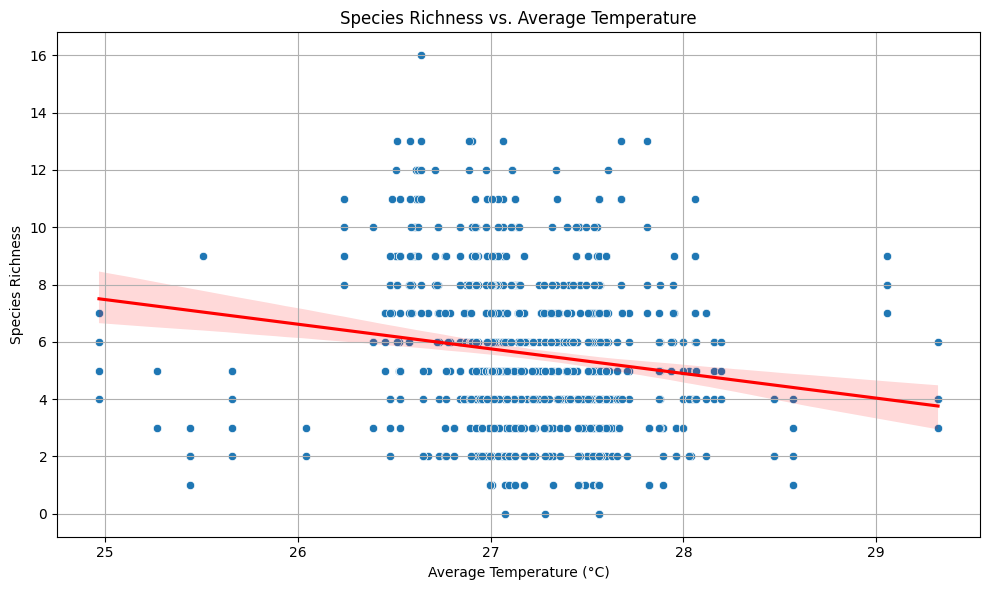

In [ ]:
# Make sure richness and temperature are present
species_avg = coral_cover.groupby(['StationID', 'Year'])['Species_Richness'].mean().reset_index()
scatter_df = merged_final.merge(species_avg, on=['StationID', 'Year'], how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x='Avg_TempC', y='Species_Richness')
sns.regplot(data=scatter_df, x='Avg_TempC', y='Species_Richness', scatter=False, color='red')
plt.title("Species Richness vs. Average Temperature")
plt.xlabel("Average Temperature (\u00b0C)")
plt.ylabel("Species Richness")
plt.grid(True)
plt.tight_layout()
plt.show()


# **STEP 5: Modeling & Forecasting Coral Health**

**STEP 5.1: Linear Regression Modeling and Forecasting (2024–2028)**

**🔷 📈 Forecast of Average Octocoral Density (2024–2028)
Observation from the plot:**
Between 2011 and 2022, we observe natural fluctuations, with a major rise between 2018 and 2022.
The model forecasts a gradual increase from ~20.5 in 2024 to ~22.5 by 2028.

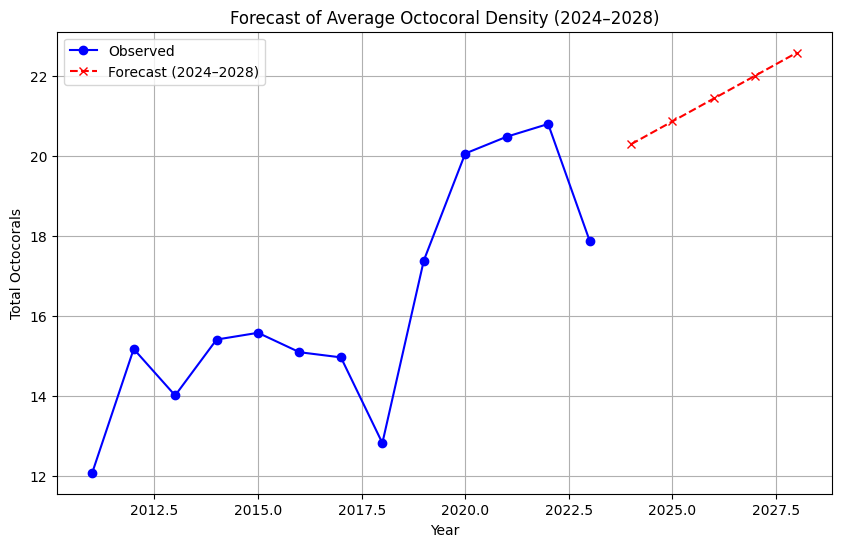

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by Year to get average octocoral count
yearly_data = merged_final.groupby("Year")["Total_Octocorals"].mean().reset_index()

# Step 2: Prepare data for model
X = yearly_data[["Year"]]
y = yearly_data["Total_Octocorals"]

# Step 3: Fit the model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict for 2024 to 2028
future_years = pd.DataFrame({"Year": np.arange(2024, 2029)})
future_preds = model.predict(future_years)

# Step 5: Plot observed + predicted
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label="Observed", color='blue')
plt.plot(future_years, future_preds, marker='x', linestyle='--', color='red', label="Forecast (2024–2028)")
plt.title("Forecast of Average Octocoral Density (2024–2028)")
plt.xlabel("Year")
plt.ylabel("Total Octocorals")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
 pd.DataFrame({"Year": future_years["Year"], "Predicted_Octocorals": future_preds})


,Year,Predicted_Octocorals
0,2024,20.291247
1,2025,20.862568
2,2026,21.433889
3,2027,22.005210
4,2028,22.576531


**Step 5.2: Forecasting with Prophet**

**This Graph Shows:**

**🔹 Top Plot:** Long-term Trend
A smooth line showing the underlying trend over years, it's starting from 1970 due to the issue above.

**🔹 Bottom Plot:** Seasonality (Annual)
Since you gave Prophet yearly data, this part is not relevant
The wavy pattern you're seeing is just noise, because there's no monthly or seasonal granularity

In [ ]:
 !pip install prophet --quiet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjf_4mbx/ky4xq4aa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjf_4mbx/5sei9xwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87552', 'data', 'file=/tmp/tmpgjf_4mbx/ky4xq4aa.json', 'init=/tmp/tmpgjf_4mbx/5sei9xwo.json', 'output', 'file=/tmp/tmpgjf_4mbx/prophet_modelop82zeir/prophet_model-20250423190527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

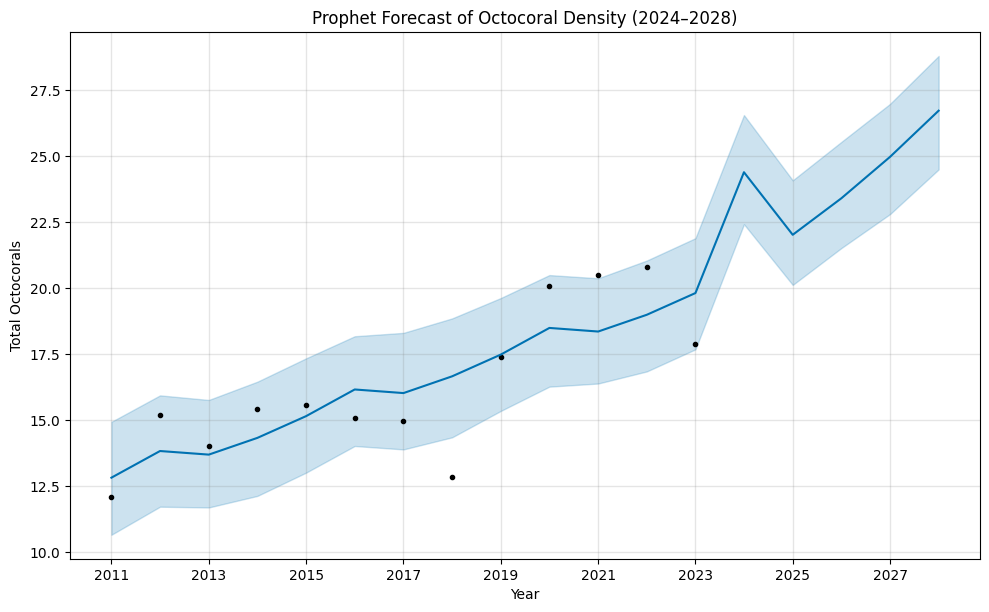

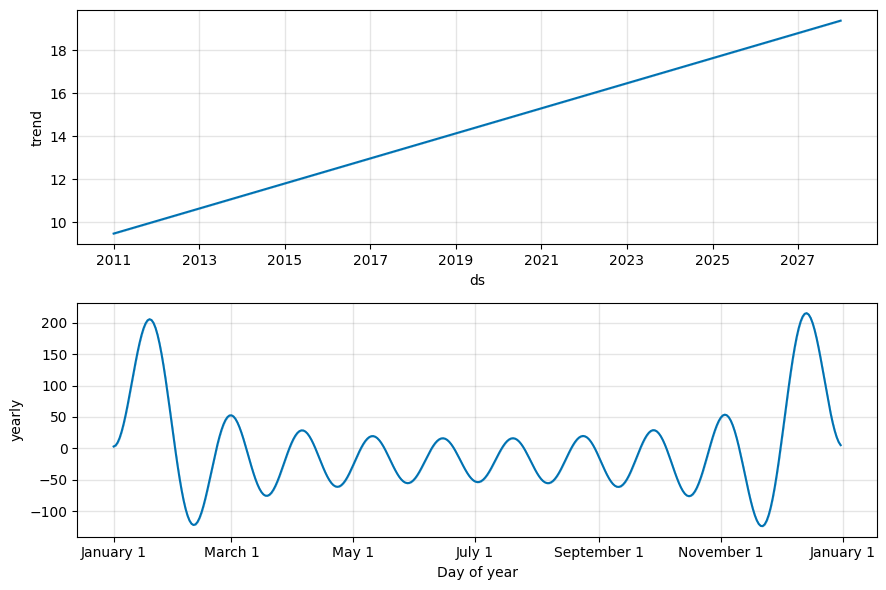

In [ ]:


# STEP 1: Import necessary libraries
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2: Prepare yearly octocoral data from your merged_final DataFrame
yearly_df = merged_final.groupby("Year")["Total_Octocorals"].mean().reset_index()

# STEP 3: Fix Prophet format - convert Year to datetime (e.g., 2011 -> 2011-01-01)
yearly_df['ds'] = pd.to_datetime(yearly_df['Year'].astype(str) + "-01-01")
yearly_df = yearly_df[['ds', 'Total_Octocorals']].rename(columns={'Total_Octocorals': 'y'})

# STEP 4: Initialize and fit Prophet model
model = Prophet()
model.fit(yearly_df)

# STEP 5: Create future dataframe for next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')  # Predict 2024–2028

# STEP 6: Predict future values
forecast = model.predict(future)

# STEP 7: Plot forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast of Octocoral Density (2024–2028)")
plt.xlabel("Year")
plt.ylabel("Total Octocorals")
plt.grid(True)
plt.show()

# STEP 8: Optional – plot forecast components (trend)
fig2 = model.plot_components(forecast)


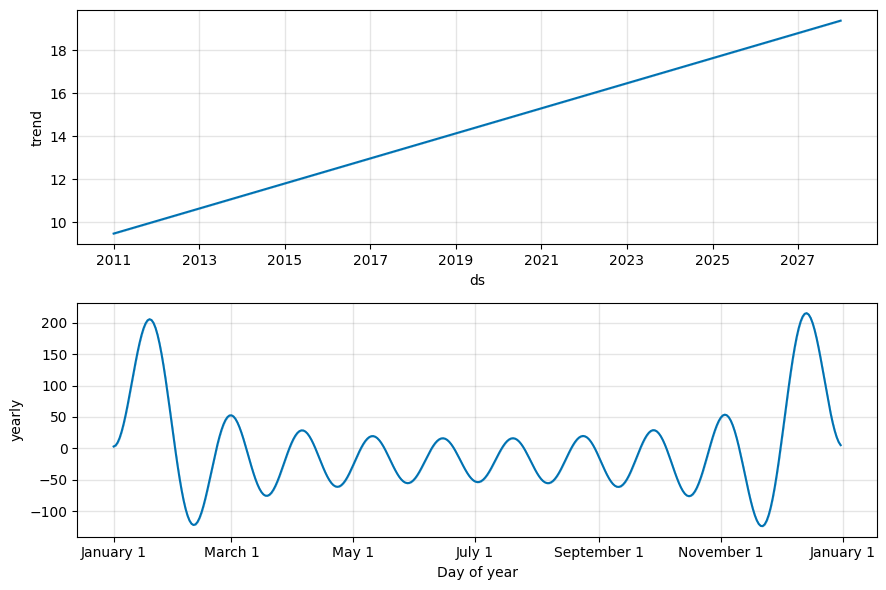

In [ ]:
fig2 = model.plot_components(forecast)
